In [8]:
import torchvision.models as models
from sympy.printing.pytorch import torch

google_net = models.googlenet(pretrained=True, )

ModuleNotFoundError: No module named 'sympy.printing.pytorch'

In [9]:
import torch

# 提取分类器的输入特征数量
fc_in_features = google_net.fc.in_features
print("fc_in_features: ", fc_in_features)

# 查看分类层的输出参数
fc_out_features = google_net.fc.out_features
print("fc_out_features: ", fc_out_features)

# 修改分类器
google_net.fc = torch.nn.Linear(fc_in_features, 10)

fc_in_features:  1024
fc_out_features:  1000


torch.Size([32, 1, 28, 28])


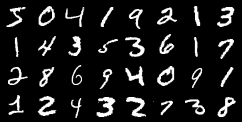

torch.Size([3, 122, 242])


In [24]:
import torchvision
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# 加载mnist数据集
mnist_dataset = datasets.MNIST(root="./data", train=True, transform=transforms.ToTensor(), download=True,
                               target_transform=None)

# 取32张图片
tensor_loader = DataLoader(dataset=mnist_dataset, batch_size=32)

data_iter = iter(tensor_loader)
img_tensor, label_tensor = next(data_iter)
print(img_tensor.shape)

grid_tensor = torchvision.utils.make_grid(img_tensor, nrow=8, padding=2)
grid_img = transforms.ToPILImage()(grid_tensor)
display(grid_img)

print(grid_tensor.shape)

torchvision.utils.save_image(grid_tensor, "./mnist_grid.png")